Amazon y Apple stock analysis by Alvaro Rivera-Eraso. 

1. Call packages. 
2. Call API + download data. 
3. Analyse data, decribes, heads, columns. 
4. Plot open vs close prices. 
5. Resample data.
6. Check autocorrelation between stocks. 
7. Shift data and check lags in each stock. 
8. Organize 1 dataframe with all data to ckeck differences between lags in stocks. 

Ok, so first Im going to install and request al packages I sill need today. 

In [1]:
!pip install yfinance
!pip install pandas_datareader
!pip install auto-sklearn
!pip install PipelineProfiler
!pip install Cython numpy
!pip apt-get install swig -y


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
import pandas_profiling
import PipelineProfiler
import yfinance as yf
from scipy.stats import chi2_contingency
from matplotlib import style
from scipy import stats
from pandas_profiling import ProfileReport
from pandas_datareader import data as pdr
#from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from autosklearn.classification import AutoSklearnClassifier
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')   
#drive.mount('/content/drive')

In [7]:
#Now I will ask for my stock
AAPL1 = yf.Ticker("AAPL") 
period_asset = "10y"
# get historical market data
AAPL1 = AAPL1.history(period=period_asset)
AAPL=AAPL1.copy()

In [8]:
#Now I will ask for my stock
AMZN1 = yf.Ticker("AMZN") 
period_asset = "10y"
# get historical market data
AMZN1 = AMZN1.history(period=period_asset)
AMZN=AMZN1.copy()

Great, now I have the Apple's and AMZN's stock for the last 10 years, now Im going to check it to see how I can engeneering the data to transform it and create my model.  

In [9]:
AMZN.info()
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2013-01-18 00:00:00-05:00 to 2023-01-17 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Volume        2516 non-null   int64  
 5   Dividends     2516 non-null   float64
 6   Stock Splits  2516 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 221.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2013-01-18 00:00:00-05:00 to 2023-01-17 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   flo

In [10]:
AMZN.columns
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [11]:
AMZN1.shape
AAPL1.shape

(2516, 7)

Here Im taking a look to each stock to understand how it behaves. The open vs the clos price for each year. 

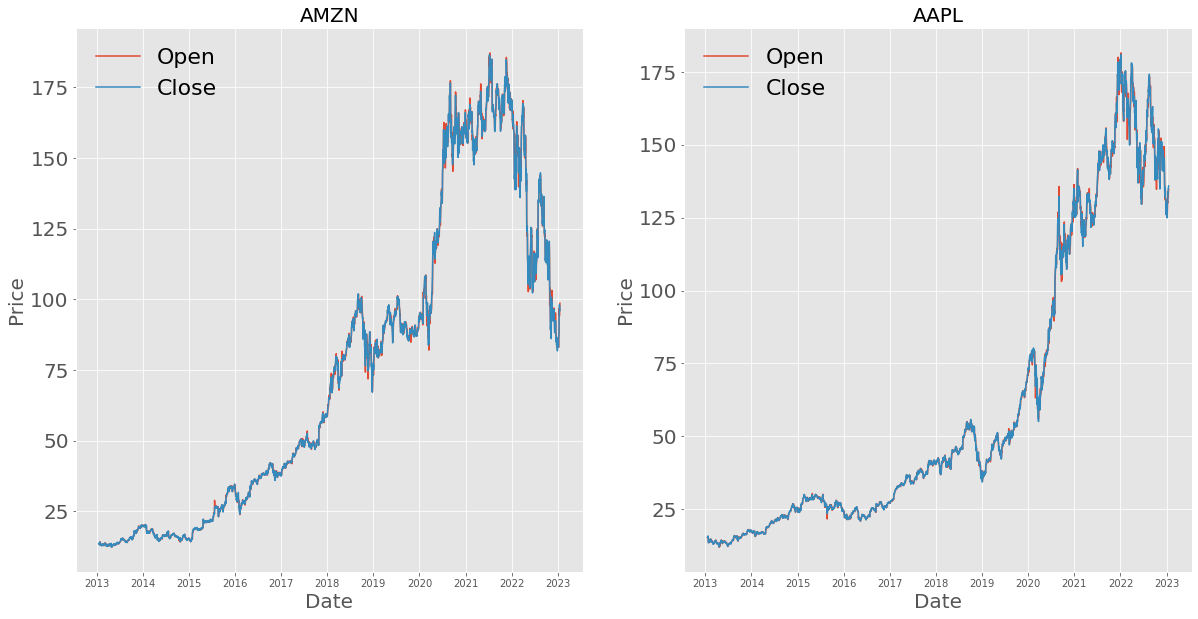

In [12]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.subplot(1,2,1) 
plt.title('AMZN',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(AMZN['Open'],label = 'Open')
plt.plot(AMZN['Close'],label = 'Close') 
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

plt.subplot(1,2,2) 
plt.title('AAPL',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(AAPL['Open'],label = 'Open')
plt.plot(AAPL['Close'],label = 'Close') 
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

I allready saw the normal behavior of the stock so I want to reample it to the business month to understan better each stock.

In [13]:
#Here i will resample the data for each business month period.
RsampAMZN=AMZN.resample('BM').last().copy()
RsampAMZN=pd.DataFrame(RsampAMZN) 
RsampAMZN.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-31 00:00:00-05:00,13.5520,13.7970,13.1850,13.2750,135442000,0.0,0.0
2013-02-28 00:00:00-05:00,13.0905,13.3500,13.0315,13.2135,53344000,0.0,0.0
2013-03-29 00:00:00-04:00,13.2910,13.3690,13.2030,13.3245,49474000,0.0,0.0
2013-04-30 00:00:00-04:00,12.4685,12.7340,12.4280,12.6905,84976000,0.0,0.0
2013-05-31 00:00:00-04:00,13.3000,13.5955,13.2970,13.4600,67486000,0.0,0.0


In [14]:
#Here i will resample the data for each business month period.
RsampAAPL=AAPL.resample('BM').last().copy()
RsampAAPL=pd.DataFrame(RsampAAPL) 
RsampAAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-31 00:00:00-05:00,14.035616,14.106257,13.974189,13.989852,319334400,0.0,0.0
2013-02-28 00:00:00-05:00,13.717968,13.835978,13.636102,13.636102,322515200,0.0,0.0
2013-03-29 00:00:00-04:00,13.896222,13.958007,13.642900,13.675029,442839600,0.0,0.0
2013-04-30 00:00:00-04:00,13.441480,13.755043,13.347875,13.678737,691538400,0.0,0.0
2013-05-31 00:00:00-04:00,14.071544,14.214593,13.978253,13.985406,384302800,0.0,0.0


In [15]:
sns.set()

Text(0.5, 1.0, 'AAPL')

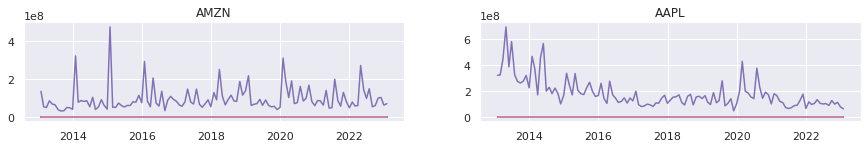

In [16]:
#Plotting my figures
plt.figure(figsize=(15,4))
plt.subplot(221)
plt.plot(RsampAMZN)
plt.title("AMZN")

plt.subplot(222)
plt.plot(RsampAAPL)
plt.title("AAPL")


Well, this is the behavior of the stock based on the business month so i will take a look if there is or not any stationary behavior in the stocks, so i will see the white noice graphics to understand it. 

Text(0.5, 1.0, 'AAPL Autocorrelation')

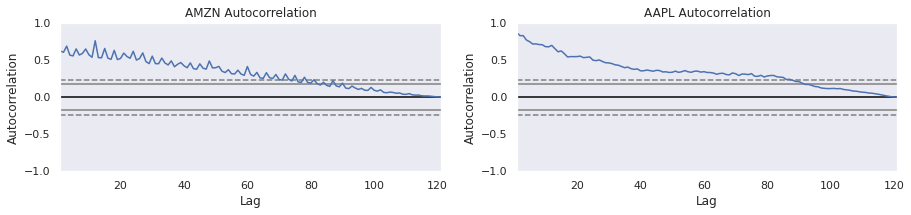

In [17]:
#Plotting my autocorrelation plots. 
from pandas.plotting import autocorrelation_plot
ax=plt.figure(figsize=(15,6))
plt.subplot(221)
autocorrelation_plot(RsampAMZN)
plt.title("AMZN Autocorrelation")

plt.subplot(222)
autocorrelation_plot(RsampAAPL)
plt.title("AAPL Autocorrelation")

Taking a look at the autocorrelation plot It's possible to see some little autocorrelation patterns in the stock, but the pattern disappears at some point. Based on that I want to take a look at the stock with 1 lag, to understand the behavior of the stock lagged. 

In [18]:
#Now Im using Shift to create the lag 1 and make the difference between observations. 
RsampAMZN1= RsampAMZN.shift(1)
RsampAMZN1=pd.DataFrame(RsampAMZN1)
newAMZN = RsampAMZN.subtract(RsampAMZN1)
newAMZN=pd.DataFrame(newAMZN)
newAMZN.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28 00:00:00-05:00,-0.4615,-0.4470,-0.153501,-0.0615,-82098000.0,0.0,0.0
2013-03-29 00:00:00-04:00,0.2005,0.0190,0.171500,0.1110,-3870000.0,0.0,0.0
2013-04-30 00:00:00-04:00,-0.8225,-0.6350,-0.775000,-0.6340,35502000.0,0.0,0.0
2013-05-31 00:00:00-04:00,0.8315,0.8615,0.868999,0.7695,-17490000.0,0.0,0.0


In [19]:
RsampAAPL1= RsampAAPL.shift(1)
RsampAAPL1=pd.DataFrame(RsampAAPL1)
newAAPL = RsampAAPL.subtract(RsampAAPL1)
newAAPL=pd.DataFrame(newAAPL)
newAAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28 00:00:00-05:00,-0.317649,-0.270280,-0.338087,-0.353750,3180800.0,0.0,0.0
2013-03-29 00:00:00-04:00,0.178254,0.122030,0.006799,0.038927,120324400.0,0.0,0.0
2013-04-30 00:00:00-04:00,-0.454742,-0.202965,-0.295026,0.003708,248698800.0,0.0,0.0
2013-05-31 00:00:00-04:00,0.630064,0.459551,0.630378,0.306669,-307235600.0,0.0,0.0


Text(0.5, 1.0, 'newAAPL')

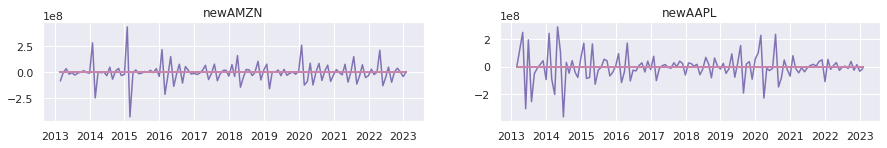

In [20]:
#the graphic for each return in each stock
plt.figure(figsize=(15,4))
plt.subplot(221)
plt.plot(newAMZN)
plt.title("newAMZN")

plt.subplot(222)
plt.plot(newAAPL)
plt.title("newAAPL")

Well, now I have the lag behavior and I can clearly see the stationary tendency in the stock for each year and the points in which the tendency has been broken down. 

Clearly, I see the tendency is more stationary in the past 3 to 4 years for each stock so I would like to see how good a machine learning model can predict the close price for each one or for one of them.

In [21]:
#Merge dataframes and rename
NewStock=pd.concat([RsampAMZN,RsampAAPL])
NewStock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-31 00:00:00-05:00,13.5520,13.7970,13.1850,13.2750,135442000,0.0,0.0
2013-02-28 00:00:00-05:00,13.0905,13.3500,13.0315,13.2135,53344000,0.0,0.0
2013-03-29 00:00:00-04:00,13.2910,13.3690,13.2030,13.3245,49474000,0.0,0.0
2013-04-30 00:00:00-04:00,12.4685,12.7340,12.4280,12.6905,84976000,0.0,0.0
2013-05-31 00:00:00-04:00,13.3000,13.5955,13.2970,13.4600,67486000,0.0,0.0


In [22]:
NewStock1=pd.concat([newAAPL,newAMZN])
NewStock1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28 00:00:00-05:00,-0.317649,-0.270280,-0.338087,-0.353750,3180800.0,0.0,0.0
2013-03-29 00:00:00-04:00,0.178254,0.122030,0.006799,0.038927,120324400.0,0.0,0.0
2013-04-30 00:00:00-04:00,-0.454742,-0.202965,-0.295026,0.003708,248698800.0,0.0,0.0
2013-05-31 00:00:00-04:00,0.630064,0.459551,0.630378,0.306669,-307235600.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-09-30 00:00:00-04:00,-15.369995,-13.669998,-13.900002,-13.769997,5830900.0,0.0,0.0
2022-10-31 00:00:00-04:00,-10.520004,-12.049995,-12.099998,-10.559998,39771800.0,0.0,0.0
2022-11-30 00:00:00-05:00,-11.089996,-8.330002,-9.209999,-5.900002,3554400.0,0.0,0.0


This is just an experiment jeje, don't pay attention, I just wanted to compare the price after and before the lags to see the tendency I just saw in the past plot.

However, it seems that concat the stocks doesn't show any clear tendency, or at least is my humble opinion. (me and my experiments) 

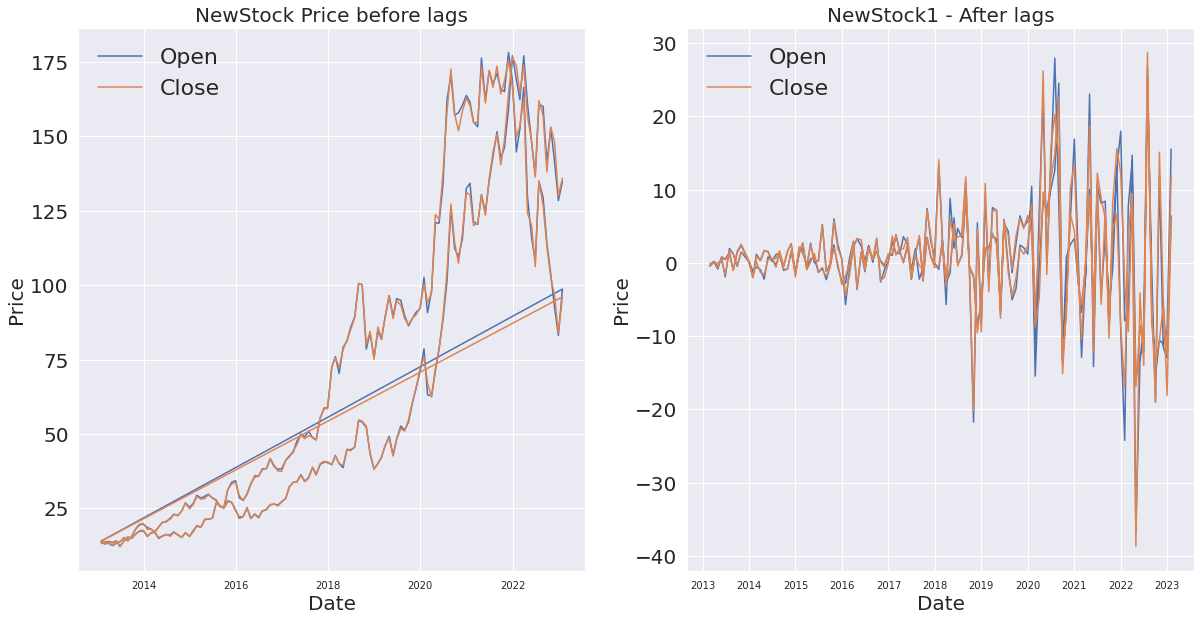

In [23]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.subplot(1,2,1) 
plt.title('NewStock Price before lags',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(NewStock['Open'],label = 'Open')
plt.plot(NewStock['Close'],label = 'Close') 
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22})

plt.subplot(1,2,2) 
plt.title('NewStock1 - After lags',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(NewStock1['Open'],label = 'Open')
plt.plot(NewStock1['Close'],label = 'Close') 
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22})

Well, now I will check the stocks, and its shape to create the data frame to prepare the model.

Data engineering... 3..2..1... go!

In [24]:
AMZN1.shape

(2516, 7)

In [25]:
AAPL.shape

(2516, 7)

In [49]:
NewStock2=pd.merge(AMZN,AAPL, on='Date',how='inner')
NewStock2 = NewStock2.drop(columns=['Dividends_x','Dividends_y','Stock Splits_x','Stock Splits_y','Volume_x','Volume_y'])
#Important... all variables_X = AMZN & all variables_Y =AAPPL
NewStock2.head()

,Open_x,High_x,Low_x,Close_x,Open_y,High_y,Low_y,Close_y
Date,,,,,,,,
2013-01-18 00:00:00-05:00,13.5415,13.7250,13.4800,13.6060,15.311471,15.425113,15.246358,15.356929
2013-01-22 00:00:00-05:00,13.5810,13.6050,13.4615,13.5095,15.496982,15.598951,15.253421,15.503431
2013-01-23 00:00:00-05:00,13.5285,13.5545,13.3325,13.4055,15.627509,15.817320,15.503425,15.787221
2013-01-24 00:00:00-05:00,13.4685,13.8325,13.4685,13.6730,14.128372,14.304362,13.828911,13.836591
2013-01-25 00:00:00-05:00,13.7500,14.2360,13.7200,14.1995,13.873139,14.012579,13.360525,13.510408


Now I ignore the variables, Stock Splits, Dividends & Valume.

With all others I will make a model to predict the close price for a new stock. 

In [50]:
NewStock2.describe()

,Open_x,High_x,Low_x,Close_x,Open_y,High_y,Low_y,Close_y
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,74.175123,75.021097,73.226576,74.133708,61.093746,61.788800,60.417289,61.127745
std,53.211768,53.864427,52.481654,53.156725,49.339198,49.985771,48.699782,49.366182
min,12.447000,12.646500,12.287500,12.411500,11.985500,12.344784,11.896837,12.064586
25%,23.896625,24.400750,23.603126,24.021125,24.931611,25.123944,24.574801,24.851482
50%,65.229248,65.674999,64.122498,64.996498,39.913394,40.437623,39.439435,39.928801
75%,108.003376,110.312124,106.300877,107.837626,94.100962,95.027158,92.790136,94.324976
max,187.199997,188.654007,184.839493,186.570496,181.576187,181.884396,178.086431,180.959747


In [28]:
#sns.pairplot(data=NewStock2)

I'm doing a dummy of my variables in order to generate the model with the variables already prepared for the ML process. 

In order to do this I will take the Quartiles for each variable and I will generate some categories based on the Q2 and Q3. 

In [54]:
import math
values = [-math.inf, 73.92, 73.93, math.inf]
category = [0,1,2]
NewStock2['Close_x']=pd.cut(x=NewStock2['Close_x'],bins=values, labels= category)


In [55]:
values = [-math.inf, 24.8, 94.32, math.inf]
category = [0,1,2]
NewStock2['Close_y']=pd.cut(x=NewStock2['Close_y'],bins=values, labels= category)

In [56]:
values = [-math.inf, 22.290000, 107.947500, math.inf]
category = [0,1,2]
NewStock2['Open_x']=pd.cut(x=NewStock2['Open_x'],bins=values, labels= category)


In [57]:
values = [-math.inf, 22.697750, 110.125498, math.inf]
category = [0,1,2]
NewStock2['High_x']=pd.cut(x=NewStock2['High_x'],bins=values, labels= category)


In [58]:
values = [-math.inf, 22.102875, 106.283127, math.inf]
category = [0,1,2]
NewStock2['Low_x']=pd.cut(x=NewStock2['Low_x'],bins=values, labels= category)


In [59]:
values = [-math.inf, 22.419250, 107.755125, math.inf]
category = [0,1,2]
NewStock2['Close_x']=pd.cut(x=NewStock2['Close_x'],bins=values, labels= category)


In [60]:
values = [-math.inf, 24.826814, 92.387652, math.inf]
category = [0,1,2]
NewStock2['Open_y']=pd.cut(x=NewStock2['Open_y'],bins=values, labels= category)


In [61]:
values = [-math.inf, 25.067094, 93.387694, math.inf]
category = [0,1,2]
NewStock2['High_y']=pd.cut(x=NewStock2['High_y'],bins=values, labels= category)


In [62]:
values = [-math.inf, 24.506494, 91.770392, math.inf]
category = [0,1,2]
NewStock2['Low_y']=pd.cut(x=NewStock2['Low_y'],bins=values, labels= category)
NewStock2

,Open_x,High_x,Low_x,Close_x,Open_y,High_y,Low_y,Close_y
Date,,,,,,,,
2013-01-18 00:00:00-05:00,0,0,0,0,0,0,0,0
2013-01-22 00:00:00-05:00,0,0,0,0,0,0,0,0
2013-01-23 00:00:00-05:00,0,0,0,0,0,0,0,0
2013-01-24 00:00:00-05:00,0,0,0,0,0,0,0,0
2013-01-25 00:00:00-05:00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2023-01-10 00:00:00-05:00,1,1,1,0,2,2,0,0
2023-01-11 00:00:00-05:00,1,1,1,0,2,2,0,0
2023-01-12 00:00:00-05:00,1,1,1,0,2,2,0,0


Well, I gonna start with the AMZN stock since it seemed to be the most stationary and the most autocorrelated one. 

In [64]:
#Ckequind my data to see if averything is ok. 
from scipy.special import xlogy
X = NewStock2[['Open_x','High_x','Low_x']].copy()
y = NewStock2['Close_x'].copy()
X


,Open_x,High_x,Low_x
Date,,,
2013-01-18 00:00:00-05:00,0,0,0
2013-01-22 00:00:00-05:00,0,0,0
2013-01-23 00:00:00-05:00,0,0,0
2013-01-24 00:00:00-05:00,0,0,0
2013-01-25 00:00:00-05:00,0,0,0
...,...,...,...
2023-01-10 00:00:00-05:00,1,1,1
2023-01-11 00:00:00-05:00,1,1,1
2023-01-12 00:00:00-05:00,1,1,1


In [65]:
#Checking y... everything is ok. 
y

Date
2013-01-18 00:00:00-05:00    0
2013-01-22 00:00:00-05:00    0
2013-01-23 00:00:00-05:00    0
2013-01-24 00:00:00-05:00    0
2013-01-25 00:00:00-05:00    0
                            ..
2023-01-10 00:00:00-05:00    0
2023-01-11 00:00:00-05:00    0
2023-01-12 00:00:00-05:00    0
2023-01-13 00:00:00-05:00    0
2023-01-17 00:00:00-05:00    0
Name: Close_x, Length: 2516, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [66]:
#Checking the sahes are ok.
print(X.shape)
print(y.shape)

(2516, 3)
(2516,)


In [67]:
#Split process qith my data, i will use the 0.2 rule. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2012, 3)
(504, 3)
(2012,)
(504,)


Now I will try with KNN classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1) #Implemento mis hiperparámetros que en este caso son los K.

In [69]:
#Aquí inicia el proceso de entrenamiento --->Model.fit siempre serán los entrenamientos. 
model.fit(X, y)  #Introduzco la matriz de datos ya lista. 
y_model = model.predict(X) #Hago la predicción y la guardo en y_model que es la predicción.

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model) #Índices de bondad para saber qué tan acertado es el modelo. 

1.0

Ready, now I have my model put into practice and ready to be deployed. I know it has 100% accuracy, however, it doesn't convince me at all. 

So I will try the cross-validation process to see how it works in different environments and if it's not good I will try other models.

In [71]:
from sklearn.model_selection import cross_val_score 
scores= cross_val_score(model, X, y, cv=500) 
# aquí lo que estoy haciendo es montar un modelo para validación cruzada a 5 pliegues, entonces lo que hago  
# es pasar el modelo, pasar los arrays "X" y "y" y luego le mando los pliegues para que me diga cuales son
#los estimadores y la predicción de los mismos. 
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [72]:
scores.mean() #entonces después lo que hago es sacarla media de los scores
#para ver en promedio como se está comportando el modelo en general. 

1.0

It looks like my model has 100% accuracy, however, I will try the autosklear model to see which model fits better... ok, even better than 100% 

Its me and my experiments :)

In [73]:
model = AutoSklearnClassifier()

In [47]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

In [80]:

automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

[WARNING] [2023-01-17 21:47:06,412:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2023-01-17 21:47:41,206:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-01-17 21:47:47,402:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-01-17 21:47:53,464:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-01-17 21:47:57,186:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-01-17 21:47:58,385:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING]

In [81]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 79f6bf8f-96b0-11ed-816e-0242ac1c000c
  Metric: accuracy
  Best validation score: 1.000000
  Number of target algorithm runs: 682
  Number of successful target algorithm runs: 455
  Number of crashed target algorithm runs: 227
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [82]:
print(automl.show_models())

{3: {'model_id': 3, 'rank': 1, 'cost': 0.0, 'ensemble_weight': 0.04, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7ff988006460>, 'balancing': Balancing(random_state=1, strategy='weighting'), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7ff9817dc520>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7ff98174bbb0>, 'sklearn_classifier': MLPClassifier(activation='tanh', alpha=1.103855734598575e-05, beta_1=0.999,
              beta_2=0.9, early_stopping=True,
              hidden_layer_sizes=(229, 229, 229),
              learning_rate_init=0.00014375616988222174, max_iter=32,
              n_iter_no_change=32, random_state=1, verbose=0, warm_start=True)}, 9: {'model_id': 9, 'rank': 2, 'cost': 0.0, 'ensemble_weight': 0.06, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoic

In [83]:
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

Output hidden; open in https://colab.research.google.com to view.

Ok, I have the AMZN stock model ready, let's try the APPLE one to see how it behaves and see which is the best model and technique for this stock.

In [84]:
#Ckequind my data to see if averything is ok. 
from scipy.special import xlogy
X1 = NewStock2[['Open_y','High_y','Low_y']].copy()
y1 = NewStock2['Close_y'].copy()
X1

,Open_y,High_y,Low_y
Date,,,
2013-01-18 00:00:00-05:00,0,0,0
2013-01-22 00:00:00-05:00,0,0,0
2013-01-23 00:00:00-05:00,0,0,0
2013-01-24 00:00:00-05:00,0,0,0
2013-01-25 00:00:00-05:00,0,0,0
...,...,...,...
2023-01-10 00:00:00-05:00,2,2,0
2023-01-11 00:00:00-05:00,2,2,0
2023-01-12 00:00:00-05:00,2,2,0


In [85]:
#Checking y... everything is ok. 
y1

Date
2013-01-18 00:00:00-05:00    0
2013-01-22 00:00:00-05:00    0
2013-01-23 00:00:00-05:00    0
2013-01-24 00:00:00-05:00    0
2013-01-25 00:00:00-05:00    0
                            ..
2023-01-10 00:00:00-05:00    0
2023-01-11 00:00:00-05:00    0
2023-01-12 00:00:00-05:00    0
2023-01-13 00:00:00-05:00    0
2023-01-17 00:00:00-05:00    0
Name: Close_y, Length: 2516, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [86]:
#Checking the sahes are ok.
print(X.shape)
print(y.shape)

(2516, 3)
(2516,)


In [87]:
#Split process qith my data, i will use the 0.2 rule. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2012, 3)
(504, 3)
(2012,)
(504,)


In [88]:
model = AutoSklearnClassifier()

In [89]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

In [90]:

automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

[WARNING] [2023-01-17 23:32:44,331:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2023-01-17 23:33:22,684:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-01-17 23:33:28,830:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-01-17 23:33:34,880:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-01-17 23:33:38,712:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-01-17 23:33:39,963:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING]

In [91]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 3b7d8af5-96bf-11ed-816e-0242ac1c000c
  Metric: accuracy
  Best validation score: 1.000000
  Number of target algorithm runs: 630
  Number of successful target algorithm runs: 410
  Number of crashed target algorithm runs: 220
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [92]:
print(automl.show_models())

{20: {'model_id': 20, 'rank': 1, 'cost': 0.0, 'ensemble_weight': 0.06, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7ff988240a30>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7ff980fb92e0>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7ff981202640>, 'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=True,
                               l2_regularization=1.3589351886855206e-10,
                               learning_rate=0.01456925523210092, max_iter=16,
                               max_leaf_nodes=1153, min_samples_leaf=140,
                               n_iter_no_change=15, random_state=1,
                               validation_fraction=0.10843571020812363,
                               warm_start=True)}, 26: {'model_id': 26, 'rank': 2, 'cost'

In [93]:
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

Output hidden; open in https://colab.research.google.com to view.